<a id="100"></a>
**HOME**

**Average daily volume (ADV)** refers to the average number of shares, contracts, or units traded per day over a specific period, typically calculated on a daily basis. It is a common metric used in financial markets to gauge liquidity and trading activity for a particular asset (such as a stock, bond, or commodity). 
* **Liquidity: High ADV usually indicates better liquidity, meaning it is easier to buy or sell an asset without significantly affecting its price.**
* **Volatility: A sudden drop in ADV might indicate a decrease in market interest or liquidity, potentially leading to higher volatility.**

### Table of Contents
* [1-Dataset](#1)
* [2-Monthly ADV](#2)
* [3-Date ADV: ALL DATA](#3)
* [4-Daily ADV](#4)
* [5-Hourly ADV](#5)

**References:**

- [Trend-Enhanced Improved Bollinger Bands Trend-Following High-Frequency Trading Strategy for Futures Market](https://drpress.org/ojs/index.php/HBEM/article/view/16586)
- [Research on Quantitative Trading Strategies Based on the Turtle Trading Rule](https://drpress.org/ojs/index.php/HBEM/article/view/7933)
- [Day Trading Strategy Based on Transformer Model, Technical Indicators and Multiresolution Analysis.](https://openurl.ebsco.com/EPDB%3Agcd%3A4%3A10823716/detailv2?sid=ebsco%3Aplink%3Ascholar&id=ebsco%3Agcd%3A177050350&crl=c&link_origin=scholar.google.com)
- [Algorithmic trading system based on technical indicators in artificial intelligence: A review](https://pubs.aip.org/aip/acp/article-abstract/2484/1/060003/2879570/Algorithmic-trading-system-based-on-technical)
- [Integrated Hybrid Approaches for Stock Market Prediction with Deep Learning, Technical Analysis, and Reinforcement Learning](https://dl.acm.org/doi/abs/10.1145/3628797.3629018)
- [Predictive Modeling of Foreign Exchange Trading Signals Using Machine Learning Techniques](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=4862571)

____

<a id="1"></a>
**1-Dataset:**

In [1]:
symbol = 'BTCUSDT'

In [2]:
from binance.client import Client  # we have to replace by requests
import pandas as pd
import time

# Initialize the Binance client
api_key = "sytvkKKUmXPabC877r7MFv7rhibYAMoczrMdTse0OSB6dRyImx1G8yEInE889y00"
api_secret = "KYgkq441X5spXpdDoLELwlcoJ3k7uh9LeXGgf7aQvABSMZl42Py3OUIwFCqVgc6L" # LOAD FROM CSV
client = Client(api_key, api_secret)

def fetch_ohlcv_batch(client, symbol, interval, start_time, limit=1000):
    """
    Fetch a batch of OHLCV data from Binance.
    """
    try:
        candles = client.get_klines(
            symbol=symbol,
            interval=interval,
            startTime=start_time,
            limit=limit
        )
        # Transform data into desired format
        ohlcv = [
            [int(c[0]), float(c[1]), float(c[2]), float(c[3]), float(c[4]), float(c[5])]
            for c in candles
        ]
        return ohlcv
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def fetch_historical_ohlcv(client, symbol, interval, start_time, limit=1000):
    """
    Fetch historical OHLCV data in batches from Binance.
    """
    all_data = []
    while True:
        data = fetch_ohlcv_batch(client, symbol, interval, start_time, limit)
        if data:
            # Append data to all_data
            all_data.extend(data)
            # Update `start_time` to the timestamp of the last fetched data point + 1 millisecond
            start_time = data[-1][0] + 1
            print(f"Fetched {len(data)} data points. Total so far: {len(all_data)}")
        else:
            print("No more data to fetch or an error occurred.")
            break

        # If the batch size is less than the limit, it means we reached the end of available data
        if len(data) < limit:
            print("Reached the end of available data.")
            break

        # To avoid rate limit issues, wait for a short while
        time.sleep(1)

    # Convert data to DataFrame
    df_daily = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df_daily['timestamp'] = pd.to_datetime(df_daily['timestamp'], unit='ms')
    return df_daily

# Usage example
if __name__ == "__main__":
    # Define parameters
    # symbol = 'BTCUSDT'        # Symbol to fetch (without '/')
    interval = Client.KLINE_INTERVAL_1DAY  # Timeframe ('1m', '5m', '1h', '1d', etc.)
    start_time = int(pd.Timestamp("2007-01-01").timestamp() * 1000)  # Start date in milliseconds
    limit = 1000              # Max data points per batch

    # Fetch historical data
    df_daily = fetch_historical_ohlcv(client, symbol, interval, start_time, limit)
    print(f"Total fetched data points: {len(df_daily)}")
    print(df_daily.head())

Fetched 1000 data points. Total so far: 1000
Fetched 1000 data points. Total so far: 2000
Fetched 715 data points. Total so far: 2715
Reached the end of available data.
Total fetched data points: 2715
   timestamp     open     high      low    close       volume
0 2017-08-17  4261.48  4485.39  4200.74  4285.08   795.150377
1 2017-08-18  4285.08  4371.52  3938.77  4108.37  1199.888264
2 2017-08-19  4108.37  4184.69  3850.00  4139.98   381.309763
3 2017-08-20  4120.98  4211.08  4032.62  4086.29   467.083022
4 2017-08-21  4069.13  4119.62  3911.79  4016.00   691.743060


In [3]:
from binance.client import Client
import pandas as pd
import time

# Initialize the Binance client
api_key = "sytvkKKUmXPabC877r7MFv7rhibYAMoczrMdTse0OSB6dRyImx1G8yEInE889y00"
api_secret = "KYgkq441X5spXpdDoLELwlcoJ3k7uh9LeXGgf7aQvABSMZl42Py3OUIwFCqVgc6L"
client = Client(api_key, api_secret)

def fetch_ohlcv_batch(client, symbol, interval, start_time, limit=1000):
    """
    Fetch a batch of OHLCV data from Binance.
    """
    try:
        candles = client.get_klines(
            symbol=symbol,
            interval=interval,
            startTime=start_time,
            limit=limit
        )
        # Transform data into desired format
        ohlcv = [
            [int(c[0]), float(c[1]), float(c[2]), float(c[3]), float(c[4]), float(c[5])]
            for c in candles
        ]
        return ohlcv
    except Exception as e:
        print(f"Error fetching data: {e}")
        return None

def fetch_historical_ohlcv(client, symbol, interval, start_time, limit=1000):
    """
    Fetch historical OHLCV data in batches from Binance.
    """
    all_data = []
    while True:
        data = fetch_ohlcv_batch(client, symbol, interval, start_time, limit)
        if data:
            # Append data to all_data
            all_data.extend(data)
            # Update `start_time` to the timestamp of the last fetched data point + 1 millisecond
            start_time = data[-1][0] + 1
            print(f"Fetched {len(data)} data points. Total so far: {len(all_data)}")
        else:
            print("No more data to fetch or an error occurred.")
            break

        # If the batch size is less than the limit, it means we reached the end of available data
        if len(data) < limit:
            print("Reached the end of available data.")
            break

        # To avoid rate limit issues, wait for a short while
        time.sleep(1)

    # Convert data to DataFrame
    df = pd.DataFrame(all_data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')
    return df

# Usage example
if __name__ == "__main__":
    # Define parameters
    # symbol = 'BTCUSDT'        # Symbol to fetch (without '/')
    interval = Client.KLINE_INTERVAL_1HOUR  # Changed to hourly ('1h')
    start_time = int(pd.Timestamp("2020-01-01").timestamp() * 1000)  # Start date in milliseconds
    limit = 1000              # Max data points per batch

    # Fetch historical data
    df_hourly = fetch_historical_ohlcv(client, symbol, interval, start_time, limit)
    print(f"Total fetched data points: {len(df_hourly)}")
    print(df_hourly.head())

Fetched 1000 data points. Total so far: 1000
Fetched 1000 data points. Total so far: 2000
Fetched 1000 data points. Total so far: 3000
Fetched 1000 data points. Total so far: 4000
Fetched 1000 data points. Total so far: 5000
Fetched 1000 data points. Total so far: 6000
Fetched 1000 data points. Total so far: 7000
Fetched 1000 data points. Total so far: 8000
Fetched 1000 data points. Total so far: 9000
Fetched 1000 data points. Total so far: 10000
Fetched 1000 data points. Total so far: 11000
Fetched 1000 data points. Total so far: 12000
Fetched 1000 data points. Total so far: 13000
Fetched 1000 data points. Total so far: 14000
Fetched 1000 data points. Total so far: 15000
Fetched 1000 data points. Total so far: 16000
Fetched 1000 data points. Total so far: 17000
Fetched 1000 data points. Total so far: 18000
Fetched 1000 data points. Total so far: 19000
Fetched 1000 data points. Total so far: 20000
Fetched 1000 data points. Total so far: 21000
Fetched 1000 data points. Total so far: 220

<a name="id"></a>
[**Back to HOME**](#100)

<a id="2"></a>
**2-Monthly ADR:**

In [4]:
from datetime import timedelta
import pandas as pd

def calculate_monthly_average_volume(df_daily, years):
    """
    Calculate monthly average volume for a specific number of years
    
    Parameters:
    df_daily (pd.DataFrame): DataFrame with daily price data
    years (int): Number of years to look back
    
    Returns:
    float: Monthly average volume for the period
    """
    # Calculate the start date for the period
    period_start = df_daily['timestamp'].max() - timedelta(days=365 * years)
    
    # Filter data for the period and create a copy to avoid warnings
    df_period = df_daily[df_daily['timestamp'] >= period_start].copy()
    
    # Add month and year column
    df_period.loc[:, 'month_year'] = df_period['timestamp'].dt.to_period('M')
    
    # Calculate monthly averages of the volume
    monthly_volumes = df_period.groupby('month_year')['volume'].mean()
    
    # Calculate overall monthly average volume
    avg_monthly_volume = monthly_volumes.mean()
    
    return avg_monthly_volume

# Calculate monthly average volume for 1-10 years
volume_results = {}
for years in range(1, 11):  # Changed range to start from 1
    avg_volume = calculate_monthly_average_volume(df_daily, years)
    volume_results[f'{years} Years'] = round(avg_volume, 2)

# Create a summary DataFrame
summary_df_monthly_volume = pd.DataFrame.from_dict(volume_results, orient='index', columns=['Monthly Average Volume'])
summary_df_monthly_volume.index.name = 'Time Period'
summary_df_monthly_volume

,Monthly Average Volume
Time Period,
1 Years,34210.31
2 Years,67478.05
3 Years,92761.78
4 Years,86765.91
5 Years,83570.79
6 Years,76760.63
7 Years,71091.93
8 Years,67392.50
9 Years,67392.50


In [5]:
# Finding the year with the smallest average monthly volume
lowest_monthly_volume_year = summary_df_monthly_volume['Monthly Average Volume'].idxmin()
lowest_monthly_volume_value = summary_df_monthly_volume['Monthly Average Volume'].min()

# Extracting only the year number
lowest_year = int(lowest_monthly_volume_year.split(' ')[0])

print(f"The year with the smallest average monthly volume: {lowest_year}")
print(f"The smallest average monthly volume: {lowest_monthly_volume_value}")

The year with the smallest average monthly volume: 1
The smallest average monthly volume: 34210.31


In [6]:
xdays=lowest_year*365

In [7]:
xdays

365

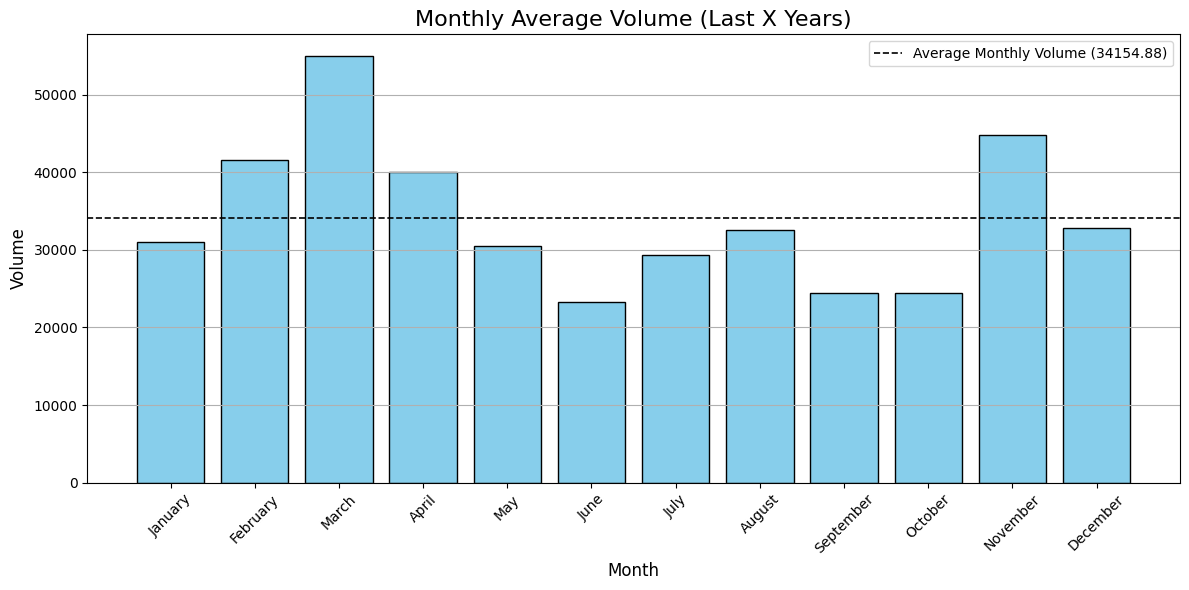

In [8]:
from datetime import timedelta
import matplotlib.pyplot as plt

# Step 1: Filter data for the last X days (e.g., 730 days = 2 years)
months_ago = df_daily['timestamp'].max() - timedelta(days=xdays)
df_last = df_daily[df_daily['timestamp'] >= months_ago].copy()  # Use .copy() to avoid the warning

# Step 2: Add a 'month_name' column for grouping by month (January, February, etc.)
df_last['month_name'] = df_last['timestamp'].dt.month_name()

# Step 3: Group by 'month_name' and calculate the average monthly volume
monthly_volume_last = df_last.groupby('month_name')['volume'].mean()

# Sort by calendar order (January to December)
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
]
monthly_volume_last = monthly_volume_last.reindex(month_order)

# Step 4: Plot the monthly volume
plt.figure(figsize=(12, 6))
plt.bar(monthly_volume_last.index, monthly_volume_last, color='skyblue', edgecolor='black')

# Highlight the Average Line
avg_volume_monthly = monthly_volume_last.mean()
plt.axhline(y=avg_volume_monthly, color='black', linestyle='--', linewidth=1.2, label=f'Average Monthly Volume ({avg_volume_monthly:.2f})')

# Add Labels and Title
plt.title('Monthly Average Volume (Last X Years)', fontsize=16)
plt.ylabel('Volume', fontsize=12)
plt.xlabel('Month', fontsize=12)
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

In [9]:
import math

monthly_adv_threshold = math.ceil(avg_volume_monthly)

In [10]:
monthly_adv_threshold

34155

<a name="id"></a>
[**Back to HOME**](#100)

<a id="3"></a>
**3-Date ADR: ALL DATA**

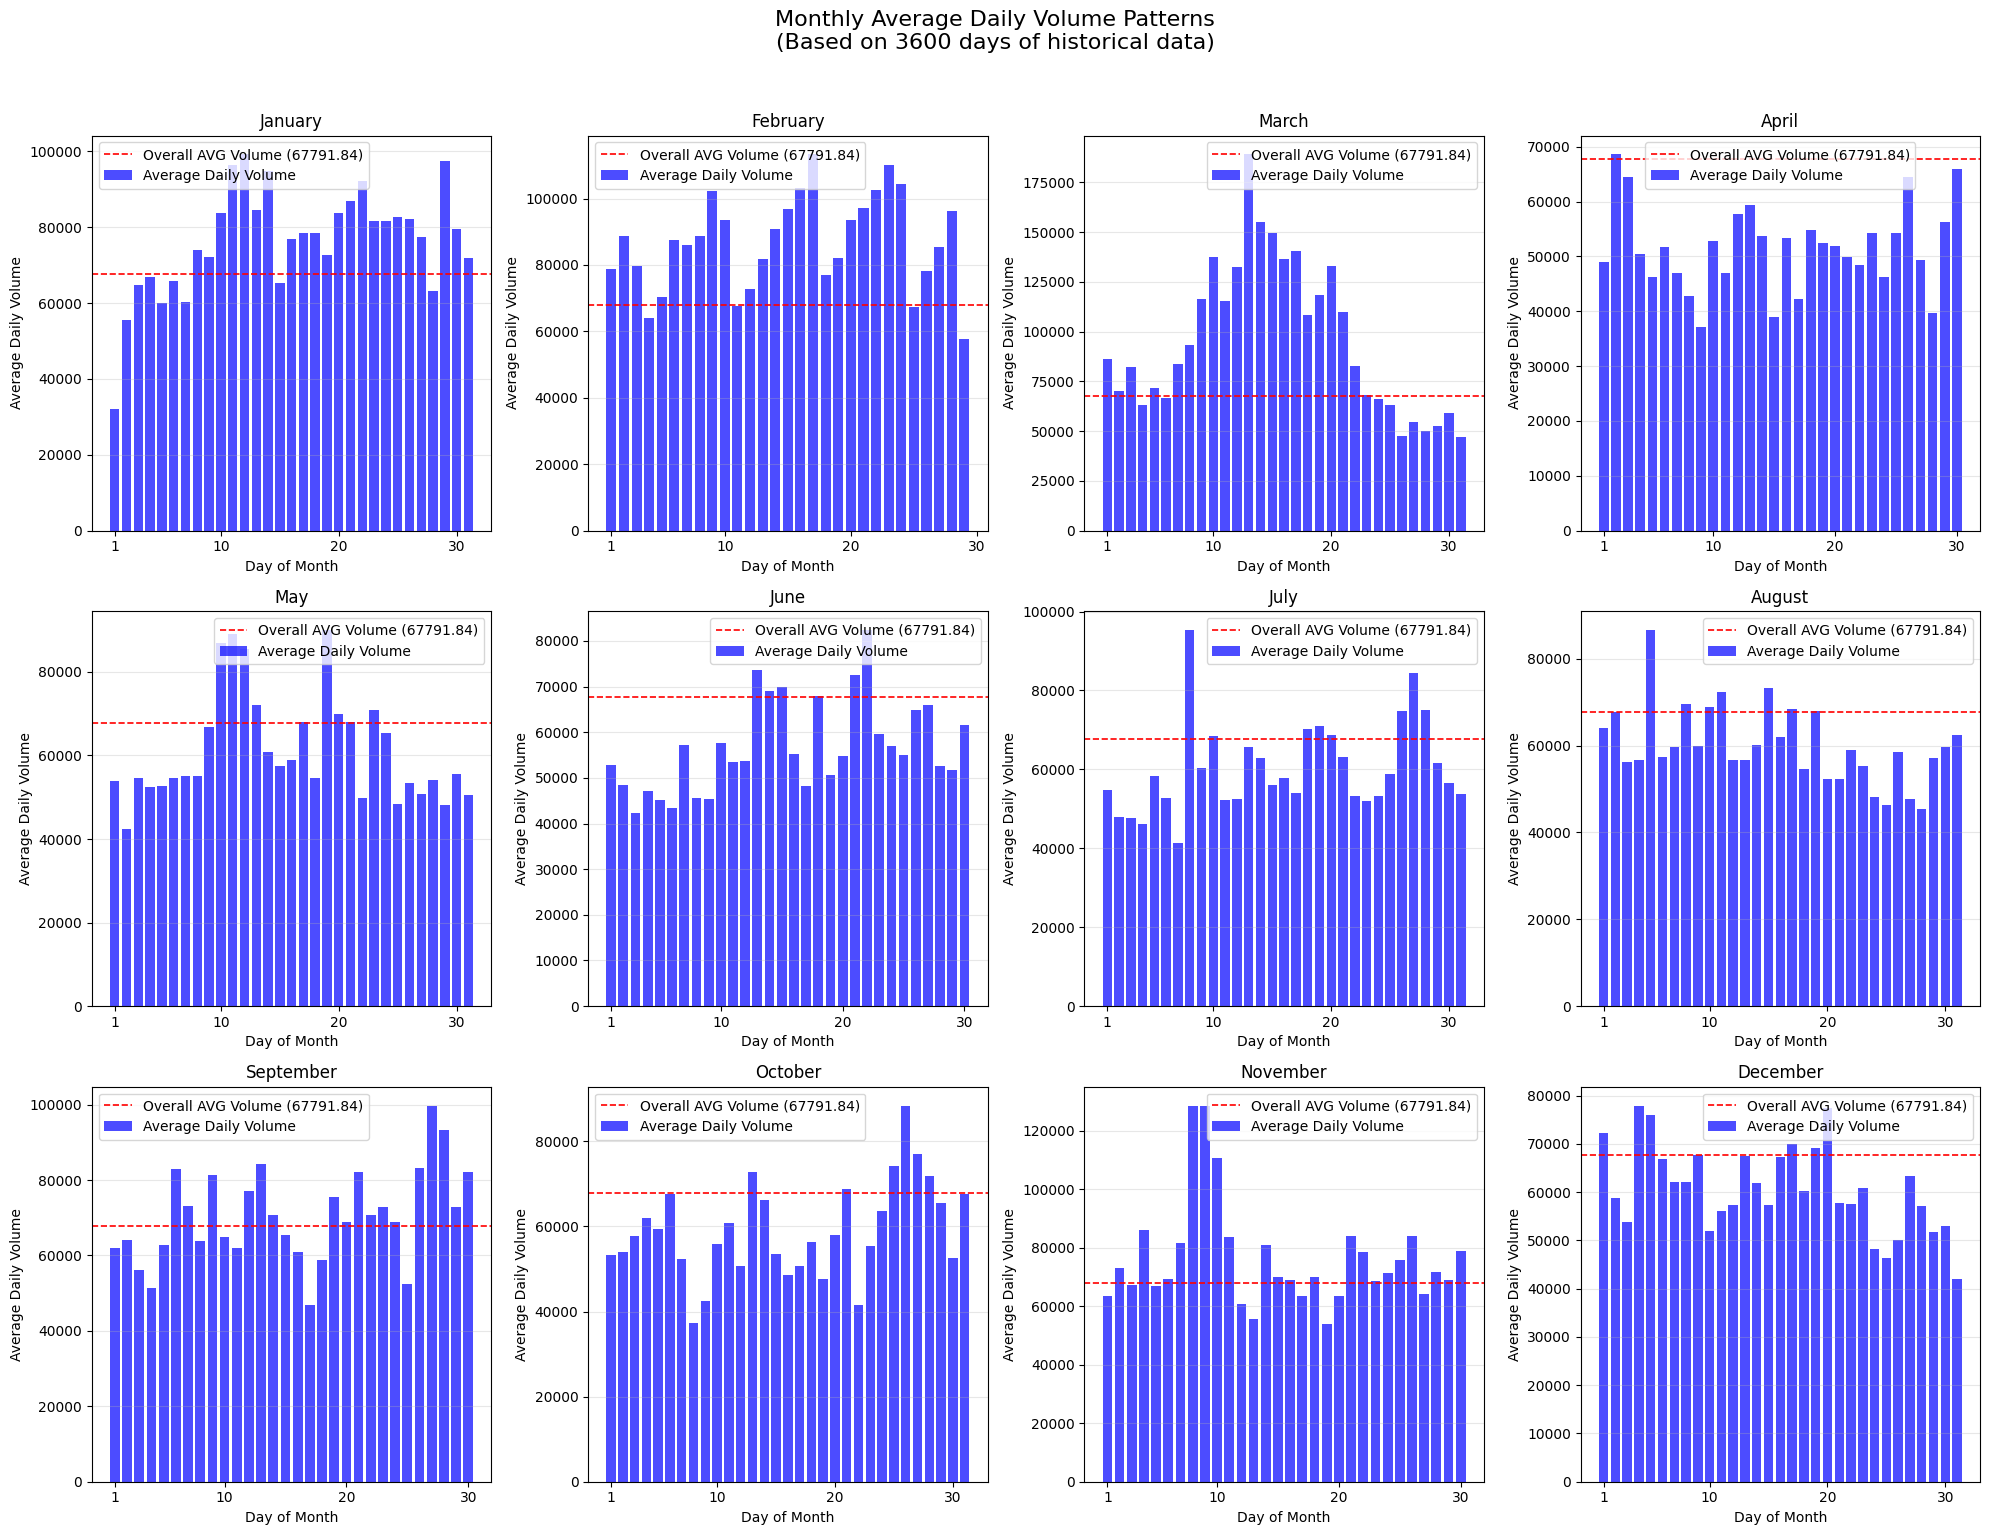


Monthly Average Daily Volume Statistics:
           Mean Volume    Std Dev  Min Volume  Max Volume
January       76031.57   84320.55     7047.90   454568.32
February      87555.61   98472.08     1521.54   496813.21
March         95094.42  122648.63    13525.09   699360.93
April         51693.67   28833.77    14371.43   206277.21
May           61149.05   45645.84    11872.12   354347.24
June          56849.26   39451.43     7308.96   254611.03
July          60331.95   53696.69    10851.37   403081.57
August        59807.56   56134.64      228.11   283995.88
September     70357.12  106565.42      500.43   593260.74
October       59165.48   78509.85      297.60   399756.68
November      76432.84  106834.64     1207.83   760705.36
December      60703.47   56890.84     4202.63   284462.91


In [11]:
from datetime import timedelta
import matplotlib.pyplot as plt
import calendar

# Step 1: Filter the last 1080 days with a proper copy
thousand_days_ago = df_daily['timestamp'].max() - timedelta(days=3650)
df_last_thousanddays = df_daily[df_daily['timestamp'] >= thousand_days_ago].copy()

# Step 2: Calculate Average Daily Volume
df_last_thousanddays['avg_daily_volume'] = df_last_thousanddays['volume']

# Step 3: Extract month and day separately
df_last_thousanddays['month'] = df_last_thousanddays['timestamp'].dt.month
df_last_thousanddays['day'] = df_last_thousanddays['timestamp'].dt.day
df_last_thousanddays['month_day'] = df_last_thousanddays['timestamp'].dt.strftime('%m-%d')

# Create subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 15))
axes = axes.ravel()

# Calculate overall average for reference line
overall_avg_volume = df_last_thousanddays['avg_daily_volume'].mean()

# Process each month
for month in range(1, 13):
    # Get data for current month
    month_data = df_last_thousanddays[df_last_thousanddays['month'] == month]
    monthly_volume = month_data.groupby('day')['avg_daily_volume'].mean()
    
    # Plot in the corresponding subplot (month-1 because arrays are 0-based)
    ax = axes[month-1]
    
    # Create bar plot
    ax.bar(monthly_volume.index, monthly_volume.values, 
           color='blue', alpha=0.7, label='Average Daily Volume')
    
    # Add average line
    ax.axhline(y=overall_avg_volume, color='red', linestyle='--', linewidth=1.2,
               label=f'Overall AVG Volume ({overall_avg_volume:.2f})')
    
    # Customize subplot
    ax.set_title(calendar.month_name[month])
    ax.set_xlabel('Day of Month')
    ax.set_ylabel('Average Daily Volume')
    ax.grid(axis='y', alpha=0.3)
    ax.legend()
    
    # Set x-axis ticks
    ax.set_xticks([1, 10, 20, 30])

# Adjust layout
plt.suptitle('Monthly Average Daily Volume Patterns\n(Based on 3600 days of historical data)', 
             fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Additional analysis: Print monthly statistics
monthly_stats = df_last_thousanddays.groupby('month').agg({
    'avg_daily_volume': ['mean', 'std', 'min', 'max']
}).round(2)

monthly_stats.columns = ['Mean Volume', 'Std Dev', 'Min Volume', 'Max Volume']
monthly_stats.index = [calendar.month_name[month] for month in range(1, 13)]
print("\nMonthly Average Daily Volume Statistics:")
print(monthly_stats)

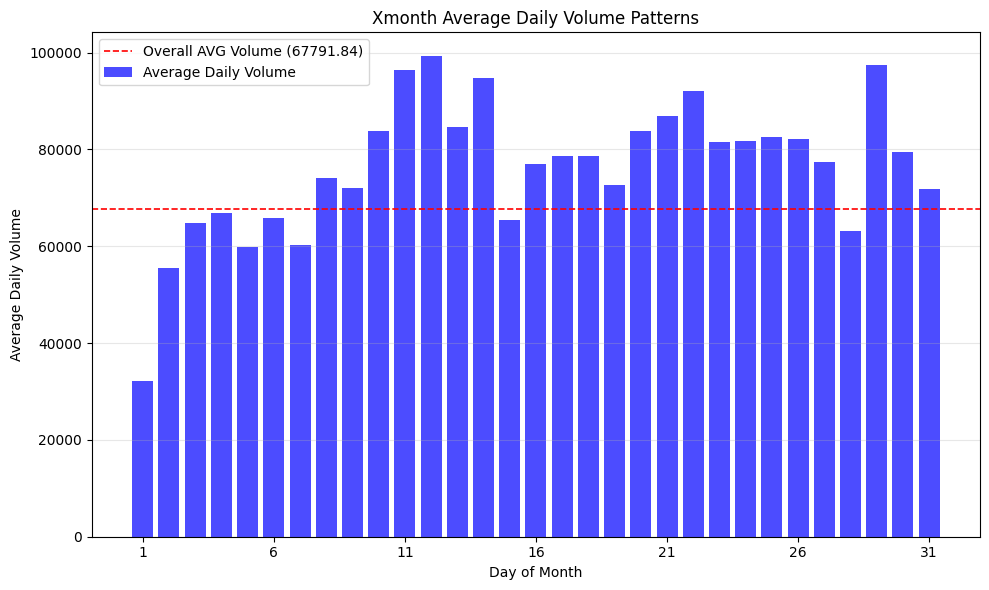


Xmonth Average Daily Volume Statistics:
mean     76031.57
std      84320.55
min       7047.90
max     454568.32
Name: avg_daily_volume, dtype: float64


In [12]:
from datetime import timedelta
import matplotlib.pyplot as plt
import calendar

# Step 1: Filter the last 3600 days with a proper copy
three_thousand_six_hundred_days_ago = df_daily['timestamp'].max() - timedelta(days=3600)
df_last_days = df_daily[df_daily['timestamp'] >= three_thousand_six_hundred_days_ago].copy()

# Step 2: Use Volume directly as Average Daily Volume
df_last_days['avg_daily_volume'] = df_last_days['volume']

# Step 3: Extract month and day separately
df_last_days['month'] = df_last_days['timestamp'].dt.month
df_last_days['day'] = df_last_days['timestamp'].dt.day

# Step 4: Filter for a specific month (e.g., January)
xmonth_data = df_last_days[df_last_days['month'] == 1]  # Change `1` to another month if needed

# Calculate average daily volume for the specified month
xmonth_avg_volume = xmonth_data.groupby('day')['avg_daily_volume'].mean()

# Create a bar plot for the specified month
fig, ax = plt.subplots(figsize=(10, 6))

# Create bar plot
ax.bar(xmonth_avg_volume.index, xmonth_avg_volume.values, 
       color='blue', alpha=0.7, label='Average Daily Volume')

# Add overall average line
overall_avg_volume = df_last_days['avg_daily_volume'].mean()
ax.axhline(y=overall_avg_volume, color='red', linestyle='--', linewidth=1.2, 
           label=f'Overall AVG Volume ({overall_avg_volume:.2f})')

# Customize plot
ax.set_title('Xmonth Average Daily Volume Patterns')  # Adjust title if changing the month
ax.set_xlabel('Day of Month')
ax.set_ylabel('Average Daily Volume')
ax.grid(axis='y', alpha=0.3)
ax.legend()

# Set x-axis ticks
ax.set_xticks(range(1, 32, 5))  # Adjust tick spacing as needed

# Show plot
plt.tight_layout()
plt.show()

# Additional analysis: Print January statistics
xmonth_stats = xmonth_data['avg_daily_volume'].agg(['mean', 'std', 'min', 'max']).round(2)
print("\nXmonth Average Daily Volume Statistics:")  # Adjust the month name if needed
print(xmonth_stats)

<a name="id"></a>
[**Back to HOME**](#100)

<a id="4"></a>
**4-Daily ADV:**

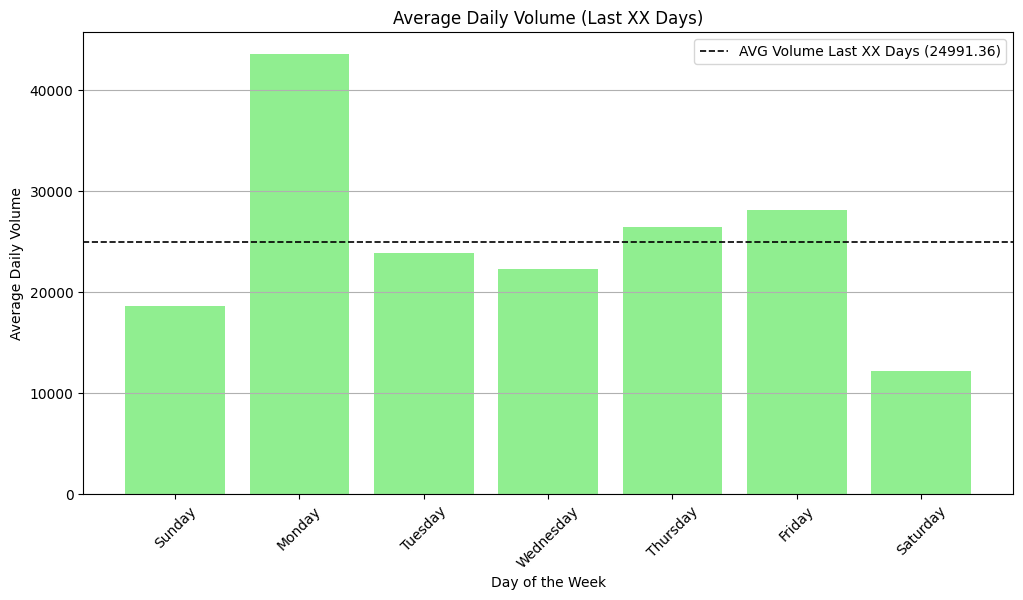

In [13]:
from datetime import timedelta
import matplotlib.pyplot as plt

# List of days to analyze
periods = [7, 30, 90, 180, 365, 1095, 1825, 3650]

# Dictionary to store results
avg_daily_volumes = {}

for days in periods:
    # Filter the last X days
    x_days_ago = df_daily['timestamp'].max() - timedelta(days=days)
    df_last_xdays = df_daily[df_daily['timestamp'] >= x_days_ago].copy()  # Use .copy() to avoid SettingWithCopyWarning
    
    # Use the volume as the metric (no need for ADR calculation)
    df_last_xdays['avg_daily_volume'] = df_last_xdays['volume']
    
    # Add day_name column
    df_last_xdays['day_name'] = df_last_xdays['timestamp'].dt.day_name()
    
    # Group by day_name and calculate mean volume
    daily_volume = df_last_xdays.groupby('day_name')['avg_daily_volume'].mean()
    
    # Sort by calendar order
    day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
    daily_volume = daily_volume.reindex(day_order)
    
    # Calculate average daily volume for this period
    avg_daily_volume = daily_volume.mean()
    
    # Store result in dictionary
    avg_daily_volumes[f'avg_volume_last_{days}days'] = avg_daily_volume

avg_daily_volumes


# Find the period with the minimum average daily volume
min_volume_period = min(avg_daily_volumes, key=avg_daily_volumes.get)
min_volume_value = avg_daily_volumes[min_volume_period]
days_for_min_volume = int(min_volume_period.split('_')[-1].replace('days', ''))


# Step 1: Filter the last X days based on the minimum volume period
xxdays_days_ago = df_daily['timestamp'].max() - timedelta(days=days_for_min_volume)
df_last_xxdays = df_daily[df_daily['timestamp'] >= xxdays_days_ago].copy()  # Use .copy() to ensure a deep copy

# Step 2: Use the volume as the metric (no ADR calculation needed)
df_last_xxdays.loc[:, 'avg_daily_volume'] = df_last_xxdays['volume']

# Step 3: Add a 'day_name' column for grouping by day (Monday, Tuesday, etc.)
df_last_xxdays.loc[:, 'day_name'] = df_last_xxdays['timestamp'].dt.day_name()

# Step 4: Group by 'day_name' and calculate the mean of daily volume
daily_volume_last_xxdays = df_last_xxdays.groupby('day_name')['avg_daily_volume'].mean()

# Sort by calendar order (Sunday to Saturday)
daily_volume_last_xxdays = daily_volume_last_xxdays.reindex(day_order)

# Step 5: Plot the daily volume
plt.figure(figsize=(12, 6))
plt.bar(daily_volume_last_xxdays.index, daily_volume_last_xxdays, color='lightgreen')

# Highlight the Average Line
daily_avg_volume_last_xxdays = daily_volume_last_xxdays.mean()
plt.axhline(y=daily_avg_volume_last_xxdays, color='black', linestyle='--', linewidth=1.2, label=f'AVG Volume Last XX Days ({daily_avg_volume_last_xxdays:.2f})')

# Add labels and title
plt.title('Average Daily Volume (Last XX Days)')
plt.ylabel('Average Daily Volume')
plt.xlabel('Day of the Week')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

<a name="id"></a>
[**Back to HOME**](#100)

<a id="5"></a>
**5-Hourly ADV:**

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta


def calculate_average_daily_volume(df_hourly, days):
    # Convert timestamp to datetime if not already
    df_hourly['timestamp'] = pd.to_datetime(df_hourly['timestamp'])
    
    # Filter data for the specified days
    last_n_days = datetime.now() - timedelta(days=days)
    df_period = df_hourly[df_hourly['timestamp'] >= last_n_days].copy()  # Explicitly create a copy
    
    # Extract the date from timestamp
    df_period['date'] = df_period['timestamp'].dt.date
    
    # Group by Date and Calculate the Total Volume per Day
    daily_volume = df_period.groupby('date')['volume'].sum()  # Sum the volume for each day
    
    # Calculate the Average Daily Volume for the period
    average_daily_volume = daily_volume.mean()
    
    return average_daily_volume

# List of days to analyze
days_list = [7, 30, 90, 180, 365, 1095, 1825, 3650, 7300, 10950]

# Calculate and print average daily volume for each period
for days in days_list:
    avg_daily_volume = calculate_average_daily_volume(df_hourly, days)
    print(f"Average daily volume for last {days} days: {avg_daily_volume:.2f}")

# Dictionary to store average daily volume for each period
daily_volume_dict = {}

# Calculate average daily volume for each period and store in dictionary
for days in days_list:
    avg_daily_volume = calculate_average_daily_volume(df_hourly, days)
    daily_volume_dict[days] = avg_daily_volume

# Find the day with the smallest average daily volume
smallest_volume_day = min(daily_volume_dict, key=daily_volume_dict.get)
smallest_volume = daily_volume_dict[smallest_volume_day]

# Show only the day with the smallest average daily volume
print(f"Day with smallest average daily volume: {smallest_volume_day} days ({smallest_volume:.2f})")

Average daily volume for last 7 days: 36417.09
Average daily volume for last 30 days: 25175.27
Average daily volume for last 90 days: 34881.92
Average daily volume for last 180 days: 31001.36
Average daily volume for last 365 days: 34087.45
Average daily volume for last 1095 days: 93777.37
Average daily volume for last 1825 days: 84090.95
Average daily volume for last 3650 days: 83778.22
Average daily volume for last 7300 days: 83778.22
Average daily volume for last 10950 days: 83778.22
Day with smallest average daily volume: 30 days (25175.27)


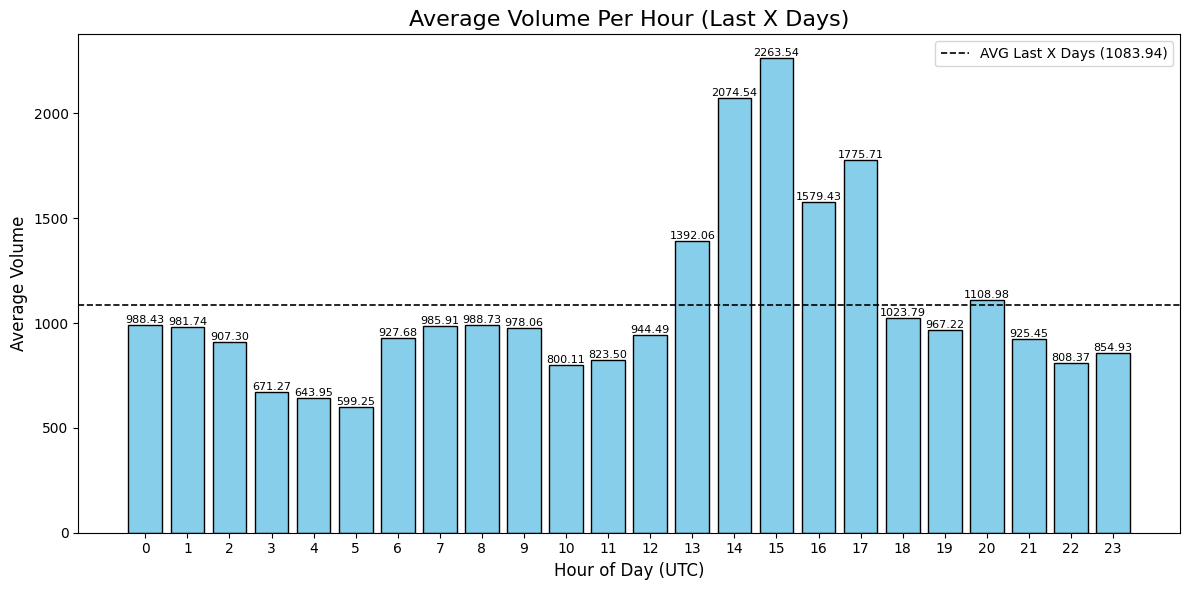

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

# Convert datetime to a pandas datetime object
df_hourly['timestamp'] = pd.to_datetime(df_hourly['timestamp'])

# Filter data for the last X days (e.g., smallest_volume_day)
last_x_days = datetime.now() - timedelta(days=smallest_volume_day)
df_last_x_days = df_hourly[df_hourly['timestamp'] >= last_x_days].copy()  # Use .copy() to avoid warnings

# Extract hour from datetime
df_last_x_days.loc[:, 'hour'] = df_last_x_days['timestamp'].dt.hour

# Calculate Hourly Average Volume
# Group by Hour and Calculate Total Volume
hourly_volume = df_last_x_days.groupby('hour')['volume'].mean()

# Prepare the plot
plt.figure(figsize=(12, 6))
bars = plt.bar(hourly_volume.index, hourly_volume, color='skyblue', edgecolor='black')

# Highlight the Average Line
average_hourly_volume = hourly_volume.mean()
plt.axhline(y=average_hourly_volume, color='black', linestyle='--', linewidth=1.2, label=f'AVG Last X Days ({average_hourly_volume:.2f})')

# Annotate Bars with Values
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.2f}', ha='center', va='bottom', fontsize=8)

# Add Chart Labels and Title
plt.title('Average Volume Per Hour (Last X Days)', fontsize=16)
plt.xlabel('Hour of Day (UTC)', fontsize=12)
plt.ylabel('Average Volume', fontsize=12)
plt.xticks(np.arange(0, 24, 1))
plt.legend()

# Show the Plot
plt.tight_layout()
plt.show()

<a name="id"></a>
[**Back to HOME**](#100)